In [1]:
import pandas as pd
csv_p = '../multi_source_dijkstra_test_result.csv'
df = pd.read_csv(csv_p)
df

,dataset,num_sources_nodes,avg_time
0,enron,1,0.124406
1,enron,2,0.122425
2,enron,5,0.123866
3,enron,10,0.123351
4,enron,20,0.123365
...,...,...,...
63,pokec,50000,35.962795
64,pokec,100000,37.551704
65,pokec,200000,36.736646
66,pokec,500000,38.055376


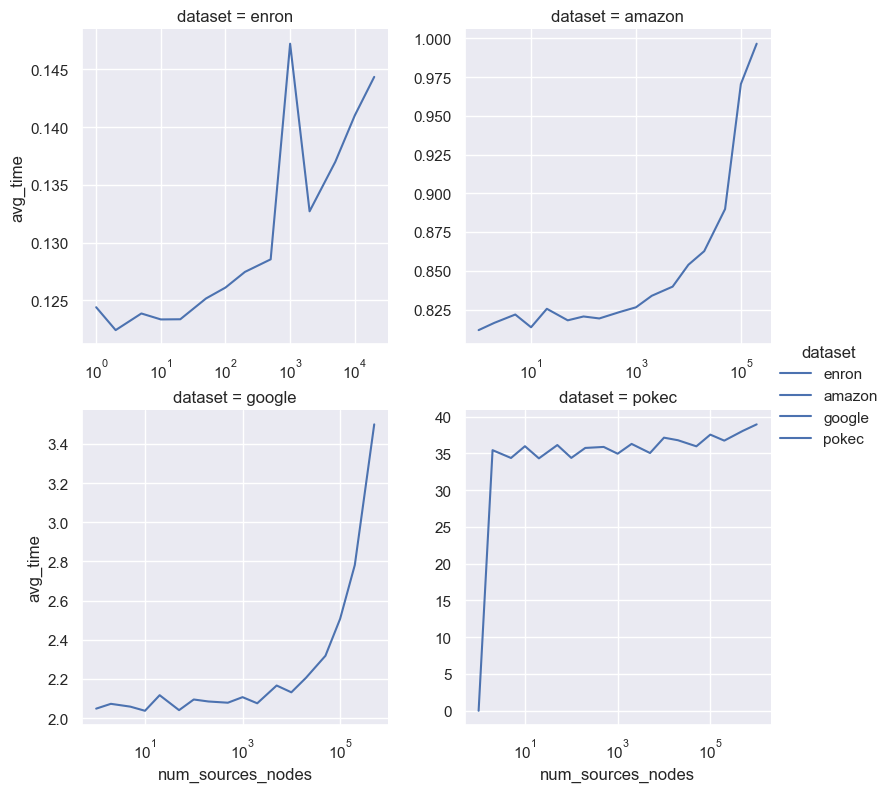

In [2]:
# for every unique dataset value, draw a line plot, x = num_sources_nodes, y = avg_time, highlight where avg_time is lowest, use log scale for x-axis
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df, col="dataset", hue="dataset", col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x="num_sources_nodes", y="avg_time", hue="dataset")
g.set(xscale="log")
g.set_axis_labels("num_sources_nodes", "avg_time")
g.add_legend()
plt.show()


In [3]:
df

,dataset,num_sources_nodes,avg_time
0,enron,1,0.124406
1,enron,2,0.122425
2,enron,5,0.123866
3,enron,10,0.123351
4,enron,20,0.123365
...,...,...,...
63,pokec,50000,35.962795
64,pokec,100000,37.551704
65,pokec,200000,36.736646
66,pokec,500000,38.055376


In [4]:
# for each dataset, find the num_sources_nodes when avg_times is minimum
# the result should be like this:
# dataset	num_sources_nodes   avg_time
# amazon   10  1.2
# enron    10  0.9
# google   10  0.9
# pokec    10  0.9
df.groupby('dataset').apply(lambda x: x.loc[x['avg_time'].idxmin()])

,dataset,num_sources_nodes,avg_time
dataset,,,
amazon,amazon,1,0.811710
enron,enron,2,0.122425
google,google,10,2.037463
pokec,pokec,1,0.000003


In [5]:
# pd load bench-results.db
# Given a table name and a SQLAlchemy connectable, returns a DataFrame
bench_results_df = pd.read_sql_table('bench_results', 'sqlite:///../bench-results.db')
bench_results_df


,id,dataset,method,tool,average_time,iteration_count,timestamp,multiprocessing,n_workers
0,1,cheminformatics,loading,graphtool,0.000472,500,2023-03-20 07:21:59.349546,False,1
1,2,cheminformatics,2-hops,graphtool,0.000123,2000,2023-03-20 07:21:59.349546,False,1
2,3,cheminformatics,shortest path,graphtool,0.000104,2000,2023-03-20 07:21:59.349546,False,1
3,4,cheminformatics,page rank,graphtool,0.000032,10000,2023-03-20 07:21:59.349546,False,1
4,5,cheminformatics,k-core,graphtool,0.000017,20000,2023-03-20 07:21:59.349546,False,1
...,...,...,...,...,...,...,...,...,...
293,294,pokec,strongly connected components,networkx,40.736737,1,2023-03-20 19:55:56.084631,False,1
294,295,pokec,k-core,networkx,194.797121,1,2023-03-20 19:55:56.084631,False,1
295,296,pokec,loading,easygraph,215.723016,1,2023-03-20 20:06:11.373912,False,1
296,297,pokec,shortest path,easygraph,34.851316,1,2023-03-20 20:06:11.373912,False,1


In [7]:
datasets = [
    'enron',
    'amazon',
    'google',
    'pokec',
]
# in bench_results_df, for tool == 'igraph', dataset in datasets, method == 'shortest path', get the average of average_time for each dataset
igraph_sp = bench_results_df[bench_results_df['tool'] == 'igraph'][bench_results_df['dataset'].isin(datasets)][bench_results_df['method'] == 'shortest path'].groupby('dataset').mean()
igraph_sp


# save equivalent sql query in igraph_sql_s variable
igraph_sql_s = """
SELECT dataset, AVG(average_time) AS avg_time
FROM bench_results
WHERE tool = 'igraph' AND dataset IN ('enron', 'amazon', 'google', 'pokec') AND method = 'shortest path'
GROUP BY dataset
"""

/var/folders/km/6sczydd546n7xmy21z8yndzw0000gn/T/ipykernel_29783/383579342.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  igraph_sp = bench_results_df[bench_results_df['tool'] == 'igraph'][bench_results_df['dataset'].isin(datasets)][bench_results_df['method'] == 'shortest path'].groupby('dataset').mean()


,id,average_time,iteration_count,multiprocessing,n_workers
dataset,,,,,
amazon,231.0,0.052453,5.0,0.0,1.0
enron,210.0,0.010272,20.0,0.0,1.0
google,256.0,0.356537,1.0,0.0,1.0
pokec,281.0,0.536720,1.0,0.0,1.0


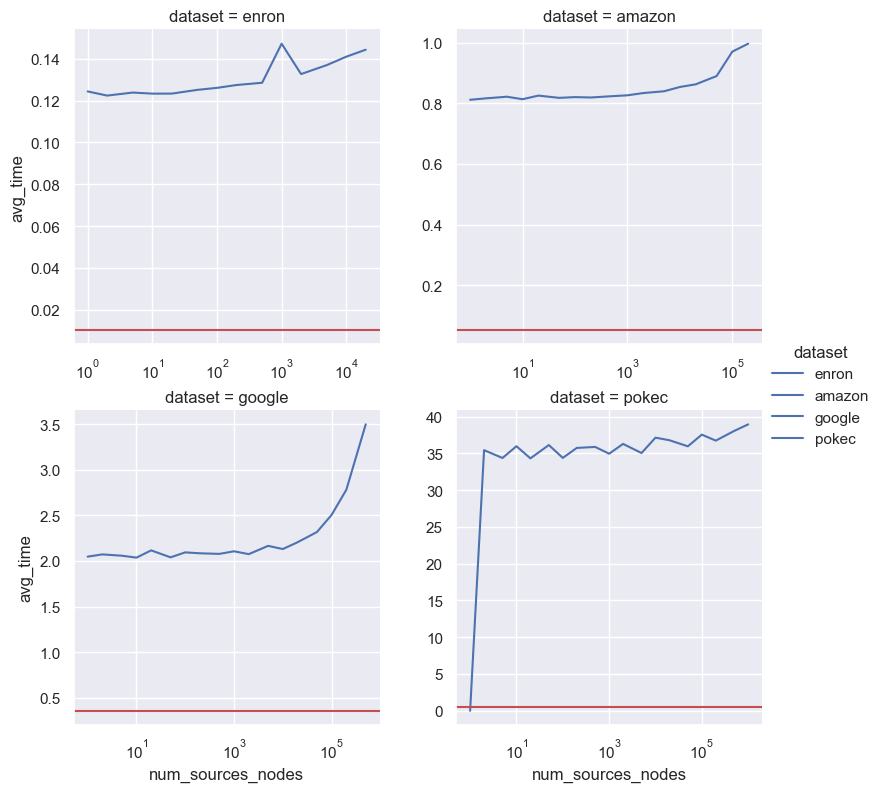

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df, col="dataset", hue="dataset", col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x="num_sources_nodes", y="avg_time", hue="dataset")
g.set(xscale="log")
g.set_axis_labels("num_sources_nodes", "avg_time")
g.add_legend()
# also plot the average_time of igraph_sp as a red horizontal line for each dataset (facetgraid's hue)
for i, dataset in enumerate(datasets):
    g.axes[i].axhline(igraph_sp.loc[dataset]['average_time'], color='r')

plt.show()
